#    **NLI-PT Experiments**

In [ ]:
# Import libraries
import csv
import shap
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import std
from numpy import mean
import scipy.stats as stats
from scipy.stats import kstest
from google.colab import files
from collections import Counter
from scipy.stats import shapiro
from sklearn import preprocessing
from scipy.stats import normaltest
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# **Statistical Analysis**

In [ ]:
# Read data
df = pd.read_csv("NLI-PT_all_features.csv", encoding= 'unicode_escape')

In [ ]:
# List all features
features = df.columns[:-1].tolist()
for i in features:
  print (i)

Cohesive Complexity Feature: Mendes Additive Connectives per Token
Cohesive Complexity Feature: Mendes All Connectives per Token
Cohesive Complexity Feature: Mendes Causal Connectives per Token
Cohesive Complexity Feature: Mendes Concessive Connectives per Token
Cohesive Complexity Feature: Mendes Other Connectives per Token
Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective
Cohesive Complexity Feature: Mendes Single-Word Connectives per Token
Cohesive Complexity Feature: Mendes Temporal Connectives per Token
Dependency Locality Theory: High Adjacent IC at Finite Verb (original cost configuration)
Dependency Locality Theory: Maximal IC at Finite Verb (higher verb weight)
Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight + higher verb weight)
Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight)
Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight + less coordination weight + added verb

* **Verify normal distribution**

In [ ]:
for i in features:
  shapiro(df[i])
  stat, p = shapiro(df[i])
  alpha = 0.05
  if p > alpha:
    print(i + ' Sample looks Gaussian (fail to reject H0)')

Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD LW Token) Sample looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD LW Type) Sample looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (N Token) Sample looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD LW Token) Sample looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: Portuguese Vocabulary Profile A1 Sample looks Gaussian (fail to reject H0)


In [ ]:
alpha = 0.05
for i in features:  
  normaltest(df[i])
  stat, p = normaltest(df[i])
  if p > alpha:
    print(i + ' looks Gaussian (fail to reject H0)')

Lexical Sophistication Feature: SUBTLEX Contextual Diversity (LW Type) looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD AW Token) looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD LW Token) looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD LW Type) looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (N Token) looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD LW Token) looks Gaussian (fail to reject H0)
Morphological Complexity Inflection Feature: Indicatives per Verb looks Gaussian (fail to reject H0)
Syntactic Complexity Feature: Dependent clauses per T-unit looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: Portuguese Vocabulary Profile A1 looks Gaussian (fail to reject H0)


* **Inspect Q-Q plots**

((array([-3.497638  , -3.25363685, -3.11868965, ...,  3.11868965,
          3.25363685,  3.497638  ]),
  array([0.34693878, 0.37837838, 0.38461538, ..., 0.81632653, 0.82142857,
         0.88372093])),
 (0.06408372346829438, 0.6007818698684615, 0.9996274993269253))

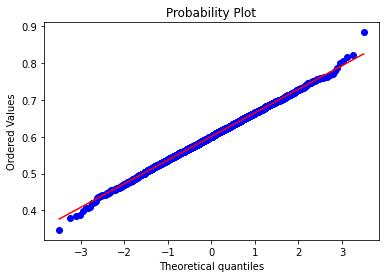

In [ ]:
stats.probplot(df['Lexical Sophistication Feature: Portuguese Vocabulary Profile A1'], dist="norm", plot=pylab)

((array([-3.497638  , -3.25363685, -3.11868965, ...,  3.11868965,
          3.25363685,  3.497638  ]), array([ 0,  0,  0, ..., 33, 35, 45])),
 (3.736870772472838, 4.26176769387064, 0.9123471605424766))

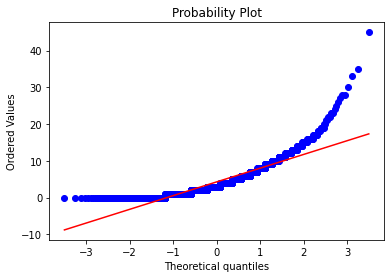

In [ ]:
stats.probplot(df['Number of Syntactic Constituents: Null Subject'], dist="norm", plot=pylab)

Only 9 features are normally distributed. This calls for a non-parametric analysis of variation.

* **Perform Kruskal-Wallis test + Episolon Squared test**

In [ ]:
# Only print moderate, relatively strong, strong and very strong effect sizes
for i in features:  
  data = [df.loc[ids, i].values for ids in df.groupby('Proficiency').groups.values()]
  H, p = stats.kruskal(*data)
  temp_df = pd.DataFrame().assign(ord=df[i],nom=df['Proficiency'])
  n = len(temp_df)
  esq = H * (n+1) / (n ** 2 -1)
  if esq >.04 and esq < .16:
    print(i + ': Moderate effect: ' , esq)
  if esq > .16 and esq < .36:
    print(i + ': Relatively strong effect ',esq)
  if esq > .36 and esq < .64:
    print(i + ': Strong effect: ',esq)  
  if esq > .64:
    print(i + ': Very strong effect: ',esq)  

Lexical Richness: Type Token Ratio (10 Segments): Moderate effect:  0.11276309444860791
Lexical Richness: Type Token Ratio (Corrected TTR Adjectives): Moderate effect:  0.11399886828045859
Lexical Richness: Type Token Ratio (Corrected TTR Adverbs): Moderate effect:  0.11916468012797368
Lexical Richness: Type Token Ratio (Corrected TTR Lexical Words): Relatively strong effect  0.16902773121679662
Lexical Richness: Type Token Ratio (Corrected TTR Nouns): Moderate effect:  0.09530622242433318
Lexical Richness: Type Token Ratio (Corrected TTR Verbs): Moderate effect:  0.1589297453225755
Lexical Richness: Type Token Ratio (Corrected TTR Words): Relatively strong effect  0.16731227797390924
Lexical Richness: Type Token Ratio (Corrected TTR): Moderate effect:  0.1599201829423682
Lexical Richness: Type Token Ratio (Root TTR Adjectives): Moderate effect:  0.11404786137396096
Lexical Richness: Type Token Ratio (Root TTR Adverbs): Moderate effect:  0.11918475392938443
Lexical Richness: Type Token